# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [557]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [558]:
# Q1.1
air = pd.read_csv('./data/airbnb_hw.csv')
air.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [559]:
print(air['Price'].isnull().sum()) # no NA values within Price
print(air['Price'].dtype) # originally a string

air['Price'] = air['Price'].str.replace(",", "") # remove the commas so I can change it to an int

air['Price'] = pd.to_numeric(air['Price']).astype('Int64') # change to an int, because price is a number and will be easier to manipulate as an int
print(air['Price'].dtype)
print(air['Price'][air['Price']>999]) # now the values with commas look good


0
object
Int64
101      1990
263      1000
764      1200
1272     1000
1275     5000
         ... 
28951    3390
28952    1356
28953    2599
28985    2000
30281    2000
Name: Price, Length: 181, dtype: Int64


In [560]:
# Q1.2
force = pd.read_csv('./data/mn_police_use_of_force.csv')
force.head()


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 

9848
(12925, 13)
0.7619342359767892
subject_injury
Yes    1631
No     1446
Name: count, dtype: int64
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
NR                  2          7051               1421        0   
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
NR                             27                 74           87   
No                             33                 34            0   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
NR                                   0                          170   
No  

<Axes: xlabel='subject_injury', ylabel='count'>

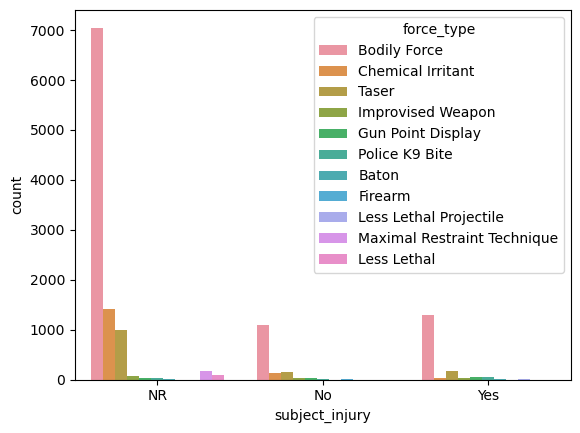

In [561]:
print(force['subject_injury'].isnull().sum())
print(force.shape)

print(9848/12925) # 76.19% of the values are missing. This is a concern because it makes us question why such a large proportion of people did not
# have an answer to if they were injured. It makes me, personally, question if there was some underlying problem during data collection where 
# actually more people were injured, but just not reported.

print(force['subject_injury'].value_counts()) # here, we can see that 1631 were injured and 1446 were not injured. Also, since injury is a simple yes or no 
# response, it makes me question why 76% were missing responses.

# replace the NA values with NR, to indicate no response, then we can see the results in the cross tabulation
force['subject_injury'] = force['subject_injury'].fillna('NR')

ct = pd.crosstab(force['subject_injury'], force['force_type'])
print(ct)
sns.countplot(data=force, x="subject_injury", hue="force_type")

# After looking at the cross tabulation and graph of injury and force type, I can see that the top 3 force types with no response for bodily injury,
# came from bodily force, chemical irritant, and taser. 


In [562]:
# Q1.3
trial = pd.read_parquet('./data/justice_data.parquet')
trial.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [563]:
#print(trial['WhetherDefendantWasReleasedPretrial'].head())
print(trial['WhetherDefendantWasReleasedPretrial'].value_counts()) 
# after putting the data into a table, I can see that there are 31 missing values, noted with a 9

trial['WhetherDefendantWasReleasedPretrial'] = trial['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan) # here i replaced the 9s with np.nan
print(trial['WhetherDefendantWasReleasedPretrial'].value_counts()) 
# After looking at the table, I noticed that the observations turned into floats, 1.0 and 0.0, so I will turn them back into 1 and 0 ints
trial['WhetherDefendantWasReleasedPretrial'] = trial['WhetherDefendantWasReleasedPretrial'].astype('Int64')
print(trial['WhetherDefendantWasReleasedPretrial'].value_counts()) 


0    9
1    0
2    0
3    0
4    1
Name: WhetherDefendantWasReleasedPretrial, dtype: int64
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64
WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
Name: count, dtype: Int64


Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [564]:
# Q1.4
print(trial['ImposedSentenceAllChargeInContactEvent'].head(10))
#print(trial['SentenceTypeAllChargesAtConvictionInContactEvent'].head(10))
print(trial['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts())
#trial['SentenceTypeAllChargesAtConvictionInContactEvent'].isnull().sum()

# I will replace blanks with 999 as a placeholder
trial['ImposedSentenceAllChargeInContactEvent'] = trial['ImposedSentenceAllChargeInContactEvent'].replace(' ', 999)
print(trial['ImposedSentenceAllChargeInContactEvent'].value_counts())

# I see that it is an object, so I will change it into an int
trial['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(trial['ImposedSentenceAllChargeInContactEvent'], errors='coerce')
trial['ImposedSentenceAllChargeInContactEvent'] = trial['ImposedSentenceAllChargeInContactEvent'].astype(int)

# now i will round the values with decimals into full numbers
trial['ImposedSentenceAllChargeInContactEvent'] = trial['ImposedSentenceAllChargeInContactEvent'].round()

# now I will change teh 999 placeholder back to NAs
trial['ImposedSentenceAllChargeInContactEvent'] = trial['ImposedSentenceAllChargeInContactEvent'].replace(999, np.nan)

0                    
1                  60
2                  12
3    .985626283367556
4                    
5                  12
6                  36
7                   6
8                  24
9                  12
Name: ImposedSentenceAllChargeInContactEvent, dtype: object
SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64
ImposedSentenceAllChargeInContactEvent
999                 9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: count, Length: 484, dtype: int64


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [565]:
# 1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.

shark = pd.read_excel('./data/GSAF5-2.xls')
shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [566]:
# 2. Drop any columns that do not contain data.
shark.isna()
shark = shark.drop(columns=['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'])
shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,Minor bite to lower body,N,1711hrs,Not stated,Bob Myatt GSAF
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,None - chunk of surfboard bitten out,N,1600hrs,Bronze whaler,Bob Myatt GSAF
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...


(array([167., 191., 245., 404., 331., 204., 201., 219., 261., 363., 500.,
        533., 714., 753., 372.]),
 array([1940.        , 1945.73333333, 1951.46666667, 1957.2       ,
        1962.93333333, 1968.66666667, 1974.4       , 1980.13333333,
        1985.86666667, 1991.6       , 1997.33333333, 2003.06666667,
        2008.8       , 2014.53333333, 2020.26666667, 2026.        ]),
 <BarContainer object of 15 artists>)

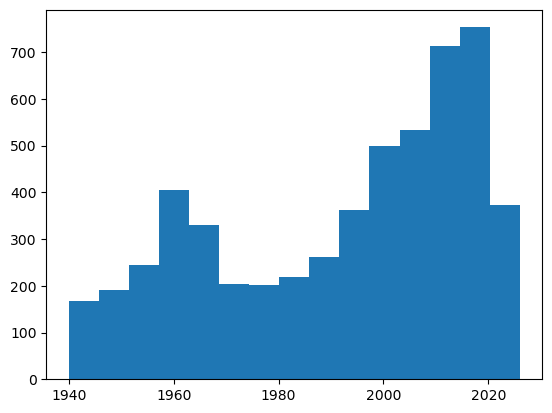

In [567]:
# 3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, 
# or remaining constant over time?
shark['Year'].head()
shark['Year'].value_counts()
shark['Year'].max
shark['Year'].min

# The range of values are anywhere from 0 to 2025
# I will delete the rows with 0 as a year, or has a null value, then keep cells from 1940 or later
shark = shark[(shark['Year'] != 0) & (shark['Year'].notna()) & (shark['Year'] >= 1940)]
shark['Year'].value_counts()

shark['Year'] = shark['Year'].astype('Int64')

plt.hist(shark['Year'], bins = 15)
# By looking at a histogram of the shark attacks by year, since 1940, the attacks have increased.


Age
16          80
19          80
17          78
15          76
18          74
            ..
46 & 34      1
12 or 13     1
18 or 20     1
86           1
F            1
Name: count, Length: 233, dtype: int64


Text(0.5, 0, 'Age')

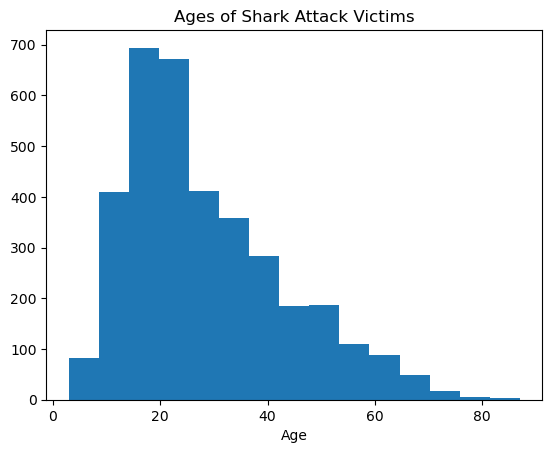

In [568]:
# 4. Clean the Age variable and make a histogram of the ages of the victims.

shark['Age'].head()
print(shark['Age'].value_counts())

shark['Age'] = pd.to_numeric(shark['Age'], errors='coerce') # first, change into numeric, as there were a few outliers
shark = shark[shark['Age'] > 2] # remove anyone less than 1 year old
shark['Age'] = shark['Age'].astype('Int64')
shark['Age'].value_counts()

plt.hist(shark['Age'], bins = 15)
plt.title('Ages of Shark Attack Victims')
plt.xlabel('Age')


In [569]:
# 5. What proportion of victims are male?
print(shark['Sex'].value_counts())
2981/(2981+545)

# 84.54% of the victims are male

Sex
M      2978
F       545
 M        1
M         1
lli       1
Name: count, dtype: int64


0.8454339194554736

In [570]:
# 6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

shark = shark[(shark['Type'] == 'Provoked') | (shark['Type'] == 'Unprovoked') | (shark['Type'] == 'Unknown')]
print(shark['Type'].value_counts())

2957/len(shark) # 91% of attacks are unprovoked


Type
Unprovoked    2957
Provoked       291
Name: count, dtype: int64


0.9104064039408867

In [571]:
# 7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
shark = shark[(shark['Fatal Y/N'] == 'Y') | (shark['Fatal Y/N'] == 'N') | (shark['Fatal Y/N'] == 'UNKNOWN')]
print(shark['Fatal Y/N'].value_counts())

Fatal Y/N
N          2732
Y           489
UNKNOWN       9
Name: count, dtype: int64


Type  Provoked  Unprovoked
Sex                       
F           21         473
M          261        2445
0.9574898785425101
0.9035476718403548
Fatal Y/N     N  UNKNOWN    Y
Sex                          
F           423        1   70
M          2287        6  413
0.1417004048582996
0.15262379896526237


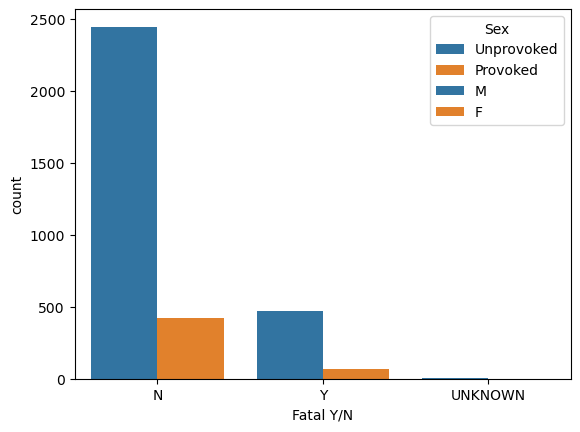

In [574]:
# 8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked 
# or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

shark = shark[(shark['Sex'] == 'M') | (shark['Sex'] == 'F')]
cts = pd.crosstab(shark['Sex'], shark['Type'])
print(cts)
sns.countplot(data=shark, x="Sex", hue="Type")

print(473/(473+21))
print(2445/(2445+261))

# Overall, by looking at the graph. sharks are more likely to launch unprovoked attacks on men. But, if we look at the proportions within genders, 
# females have a higher proportion of getting attacked unprovoked within the female group.

Fatal Y/N     N  UNKNOWN    Y
Sex                          
F           423        1   70
M          2287        6  413
0.1417004048582996
0.15262379896526237


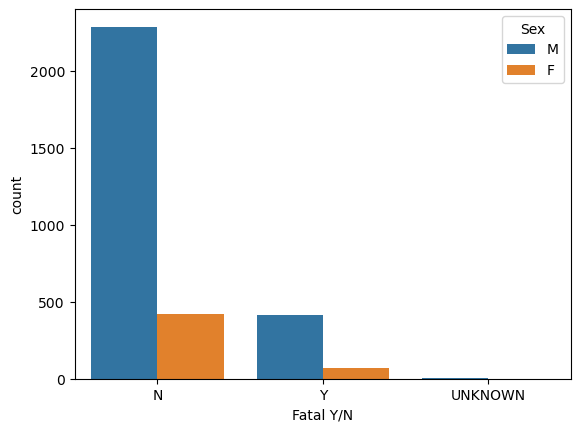

In [576]:
shark = shark[(shark['Fatal Y/N'] == 'Y') | (shark['Fatal Y/N'] == 'N') | (shark['Fatal Y/N'] == 'UNKNOWN')]
cts = pd.crosstab(shark['Sex'], shark['Fatal Y/N'])
print(cts)
sns.countplot(data=shark, x="Fatal Y/N", hue='Sex')

print(70/(70+1+423))
print(413/(413+6+2287))

# By both looking at the graph and looking at the proportions within gender, it is more likely to be fatal then the victim is male.


In [573]:
# 9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

shark['Species '].head()
print(shark['Species '].value_counts())
shark['Species '].isnull().sum()

shark['white_shark'] = shark['Species '].str.contains(r'\bwhite shark\b', case=False, na=False)

print(shark['white_shark'].mean())
419/len(shark)

# 13.1% of attacks appear to be from white sharks.



Species 
White shark                                                          98
Bull shark                                                           51
Tiger shark                                                          49
4' shark                                                             35
6' shark                                                             29
                                                                     ..
1.5 to 2 m shark                                                      1
Blacktip shark, 5'                                                    1
Nurse shark, 2' to 3'                                                 1
White shark, 12'                                                      1
White shark, 160-kg [353-lb], identity confirmed by tooth pattern     1
Name: count, Length: 1068, dtype: int64
0.1309375


0.1309375

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

This paper will be about a component of data cleaning called data tidying, which will make datasets easier to manipulate, visualize, and model because they have a specific structure. 

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

Having a standard way to organize data will make data cleaning easier because we don't need to start from scratch every time. With a tidy data standard, it will be more straightforward to do our EDA and visualizations. Instead of going into a dataset and trying to organize variables and fix things, tidy data standard provides more of a framework when it comes to organization.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

Happy families and tidy datasets are similar because they share a trait that makes them have that positive factor, kind of like a "glue" that holds them together. Whereas for unhappy families and messy datasets, there can be several different factors that make them unhappy or negative, but that factor differs throughout everyone. 

Observations and variables are easy to differentiate, but giving them precise names that match the context of the entire dataset and research question is more difficult. So, depending on how we will analyze and structure the dataset, observations and variables may be less clear.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

Wickham describes these three words in a visual way. Values (represented by numbers or strings), are shared by variables (a column that shares the same unit of measure or attribute) and observations (all values measured on the same unit). 

  5. How is "Tidy Data" defined in section 2.3?

The main point of tidy data comes from its relationship with rows/observations, columns/variables, and values in the table. It creates a standard to organizing the data in the table, overall making it easier to extract specific parts in the data. 

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

"• Column headers are values, not variable names.

• Multiple variables are stored in one column.

• Variables are stored in both rows and columns.

• Multiple types of observational units are stored in the same table. 

• A single observational unit is stored in multiple tables."

The table 4 is messy because the  arrangement's rows and columns are both variables, instead of the typical variable and observation. Melting a dataset is turning the columns into rows.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy because there is a column for each possible day in a month. This takes up space and since they are the same observational unit, they should be sorted together. Table 12 "molten" because it was melted, making it easier to do analysis on. Then it is tidy because they made it so each day was its own observation. Originally there was 2 columns, min and max, being stored in the same column, but breaking them up into two columns based on the same observation tidyed the data.

8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

The chicken and egg problem is that in order to tidy data, you need the appropriate tools, but in order to make use of the appropriate tools, you need tidy data. Wickham hopes there is a long term solution to this problem, where you don't need to start out with either tidy data, or the appropriate tools to have different, but still good, frameworks of organizing data.


**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?